In [ ]:
from IPython.display import HTML, IFrame, Image
import numpy as np
from numpy import random
from numpy.random import normal, uniform
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
%matplotlib inline

In [3]:
plt.style.use('seaborn-talk')
matplotlib.rcParams['axes3d.grid'] = False
matplotlib.rcParams['grid.alpha'] = 0
import warnings
warnings.filterwarnings('ignore')

### Generate some data for plotting

In [32]:
N = 28335 * 2
data = np.hstack((random.uniform(-3, 3, size=(2, N // 5)), 
                  random.normal(-.9, .6, size=(2, N )),
                  random.normal(-1.2, .2, size=(2, N // 10 )),
                  random.normal(-1.5, .1, size=(2, N // 3 )),
                  random.normal(.9, .6, size=(2, N // 2 )),
                  (random.normal(0, .2, size=(N // 40, 2 )) + [-1.5, 0.5]).T,
                  (random.normal(0, .2, size=(N // 7, 2 )) + [1.5, -0.5]).T,)[::-1]
                )
data = data[:, np.all(np.abs(data) < 3,axis=0)]

th = 0.3
data = data.T @ [[-np.sin(th), np.cos(th)], 
               [np.cos(th), np.sin(th)]]
data = data.T

df = pd.DataFrame(data.T, columns=['x', 'y'])
df.y += .2
df.x *= 1.2
df += 2

N = 10000
df2 = pd.concat((pd.DataFrame(data=np.array([normal(-1.5, 1, N), normal(0, 2, N)]).T, columns=['x', 'y']),
                 pd.DataFrame(data=np.array([normal(1.5, 1, N), normal(0, 2, N)]).T, columns=['x', 'y']),))

df3 = pd.DataFrame()
df3['a'] = random.uniform(0, 10, 1000)
df3['b'] = df3.a + random.uniform(0, 2, 1000)
df3['c'] = random.uniform(0, 10, 1000)
df3['d'] = df3.a + df3.c ** 2

# Visualizing Large Datasets: How Datashader Does it

![](images/usa_census.jpg)

## Bias from Statistics

In [5]:
df.head()
# df.describe()

,x,y
0,0.542363,3.619493
1,0.761196,3.514657
2,0.773940,3.376688
3,0.795141,3.709996
4,0.924028,3.462618


![Image](./images/6-blind-men-hans.jpg)

## Bias from Visualization: Same Data, Different Interpretation
![Image](./images/lying_barcharts/chart_comb.png)

![Image](./images/lying_barcharts/chart_comb2.png)

![Image](./images/lying_with_stats.jpg)

## Problem: The Statistician Themselves Must Understand the Data 

![Image](./images/data_science_process.png)

## We Need Enough Data for a Clear Picture...

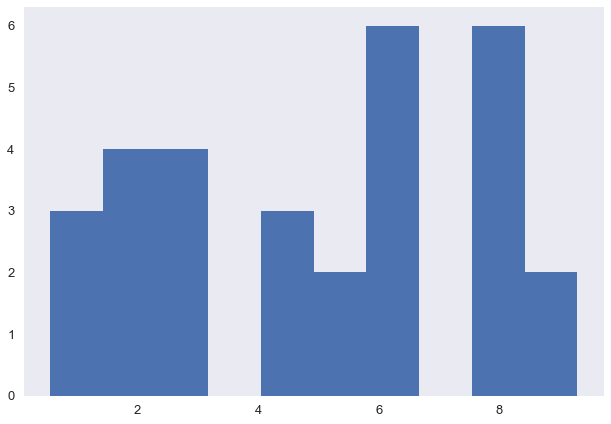

In [6]:
data = random.uniform(0, 10, size=30)
plt.hist(data);

## ...and More Data Reveals Interesting Patterns

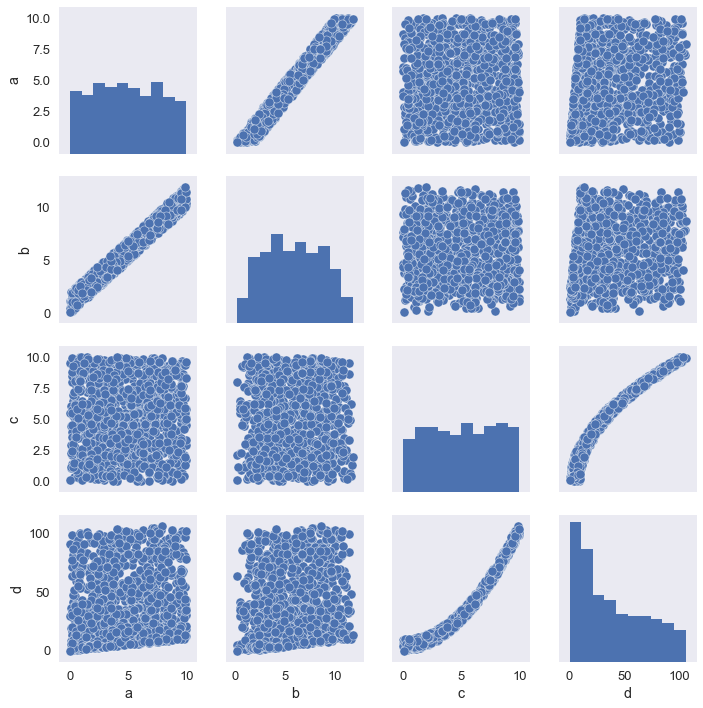

In [7]:
sns.pairplot(df3)

## ...But Data Often Needs to Be Filtered and Simplified to Make Sense of So Much of It..

![](./images/PLOS_fMRI-2-690x320.jpg)

In [8]:
IFrame('http://blogs.plos.org/neuro/2018/01/08/can-we-trust-statistics-in-fmri-studies/', width=1400, height=400)

## ...making Blind Elephant Researchers of the Statisticians! 

![Image](./images/elephant-with-blind-men.jpg)

![](images/mcluhan_quote.jpg)

## Goal: Get Accurate, Informative, Non-Biased Views of All Our Data
![Image](./images/data_science_process.png)

## Session Plan

  - Explore Some Sample Data with Matplotlib
  - Identify Biases that Large Datasets Create
  - Find Solutions to those problems.
  - Try it out in DataShader.
  - Understand the Problem that DataShader is trying to solve.
  - Discuss our strategies for informative data vizualization.
  - Share Ideas and Tools for Better Visualization.
  
  

## Exploring Data with Numpy, Pandas, Matplotlib, and Seaborn

In [9]:
df.head(5)

,x,y
0,0.542363,3.619493
1,0.761196,3.514657
2,0.773940,3.376688
3,0.795141,3.709996
4,0.924028,3.462618


## Q1: Is there a Correlation between x and y?
![Image](./images/pearson_r.png)

Correlation: r=0.35, p=0.00


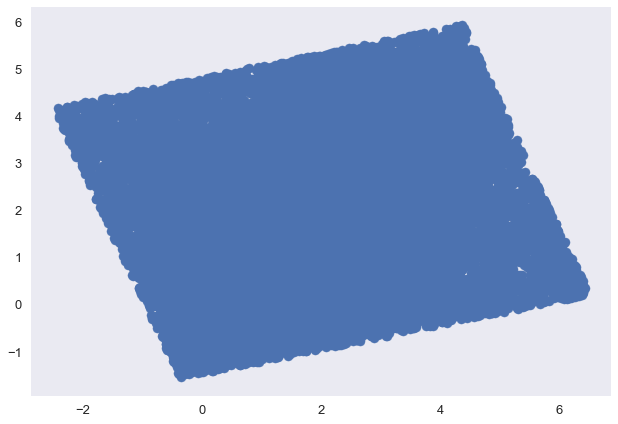

In [10]:
df.head(3)
print("Correlation: r={:.2f}, p={:.2f}".format(*stats.pearsonr(df.x, df.y)))
plt.scatter(df.x, df.y)

### Overplotting is Dataset-Specific

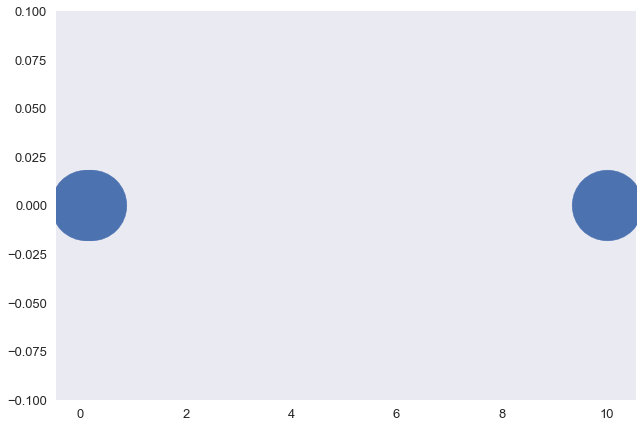

In [11]:
data = [0.1, 0.2, 10]
plt.scatter(data, np.zeros_like(data), s=5000)
# plt.xlim([0, .5])


## Histograms and Overplotting

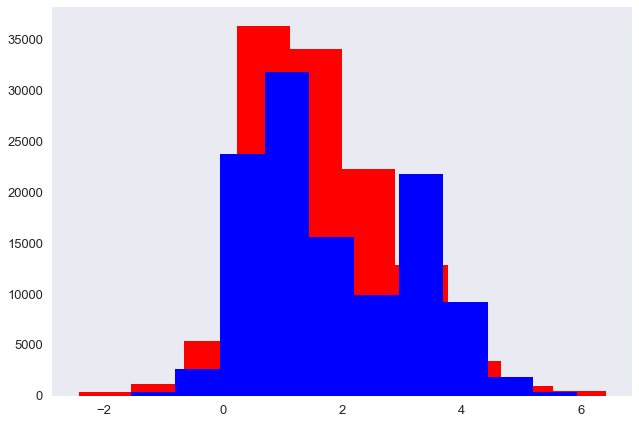

In [12]:
plt.hist(df.x, color='r');
plt.hist(df.y, color='b');

## Different Plotting Packages Have Different Defaults

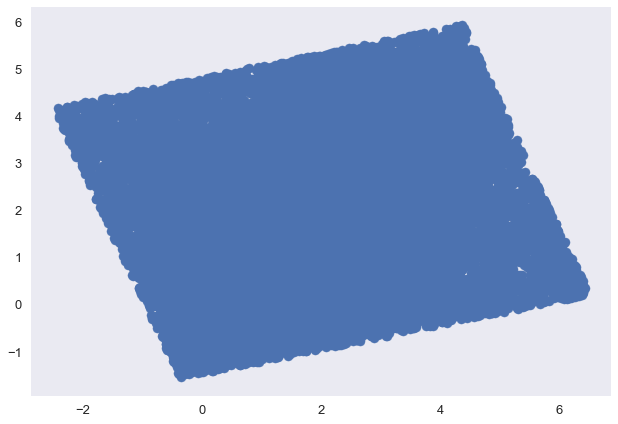

In [13]:
plt.scatter(df.x, df.y);

## Review: Potential Data Vizualization Problems

  - **Undersampling**: When there isn't enough data to see a relationship
  - **Overplotting**: When Data Points Occlude Each Other
  
  - **Oversaturation**: When Opacity values exceed 100%, obscuring the data range.
  - **Undersaturation**: When the data is too transparent to observe at all.
  
We can combat overplotting by changing **marker size**, **transparency**, and **figure size**. 

# The Search for Parameter-less Plotting

## Starting Simple: One Dimension

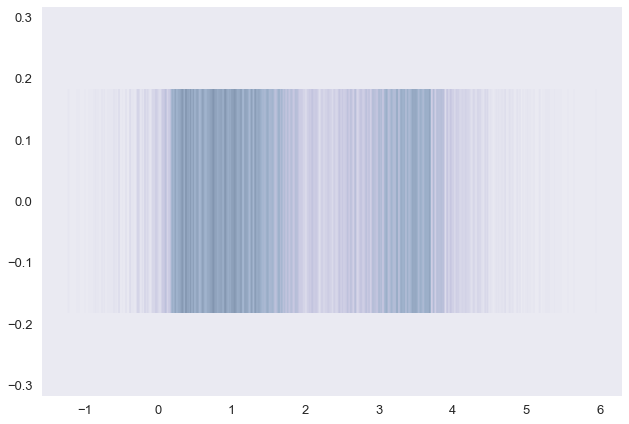

In [14]:
N = 5000
plt.scatter(df.y.sample(N), np.zeros(N), marker='|', s=50000, alpha=.01);

## Heatmaps: Taking advantage of a 3rd Dimension
And Solving Remaining Problems: Undersaturation and Missing Data

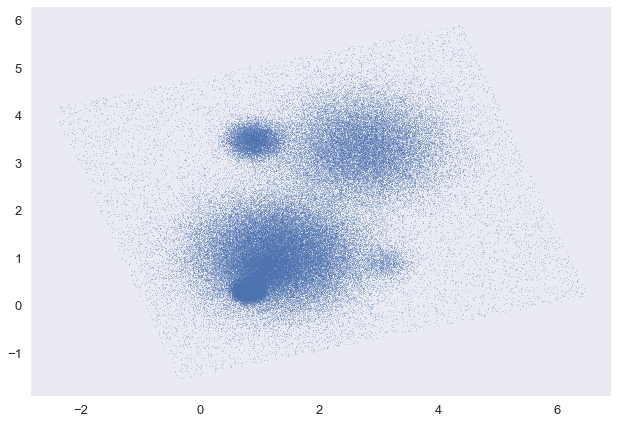

In [33]:
plt.scatter(df.x, df.y, s=.05)


### Aside: Choose Colormaps Carefully

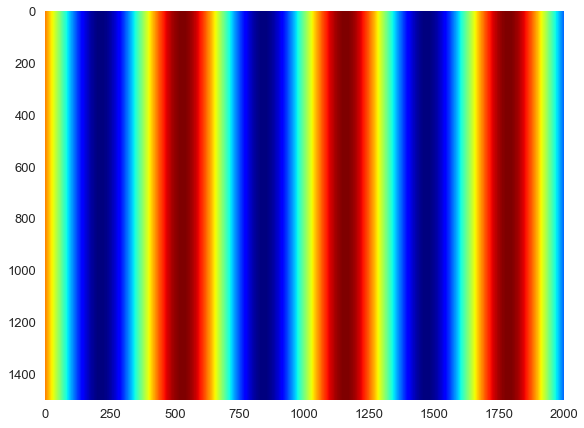

In [16]:
wave = np.array([np.sin(np.linspace(-10, 10, 2000))] * 1500)
plt.imshow(wave, cmap='jet')

In [17]:
IFrame('https://matplotlib.org/users/colormaps.html', width=800, height=600)

## Colormap Resolution and Dynamic Range

In [134]:
from matplotlib import cm

## Review

  - Scatterplots with tiny, transparent dots are essentially 2D histograms.
  - 2D histograms can be shown as heatmaps.
  - Heatmaps are immune to overplotting, because they aggregate data.
  - Heatmaps do not oversaturation by default.
  
  - **Undersaturation** can be solved with a special *"no-data"* color.
  - **Underutilized Dynamic Range** can be *helped* with modified color scales:
    - Log-Scale squeezes data together and can help.
    - Equalized histogams squeeze data and use the entire color scale automatically.

## Trying it Out in Datashader

In [135]:
import datashader as ds
import datashader.transfer_functions as tf

In [140]:
# cvs = ds.Canvas(plot_height=400, plot_width=400)
# agg = cvs.points(df, 'x', 'y')
# img = tf.shade(agg, how='eq_hist', cmap=ds.colors.viridis)
# img

## Using Holoviews to call Datashader

In [199]:
import holoviews as hv
from holoviews.operation.datashader import datashade
hv.extension('matplotlib')

In [198]:
%%output size=100
# points = hv.Points(df)

## An Example from My Work: Rat Motion Tracking in Virtual Reality

![](images/rat_control.png)

![](images/VRObject.png)

## Further Reading

In [201]:
IFrame('http://datashader.org/user_guide/1_Plotting_Pitfalls.html', width=800, height=400)